In [1]:
import pandas as pd
import numpy as np

In [53]:
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
from IPython.display import Image


In [54]:
df = pd.read_csv("results")

In [55]:
df.head()

,text,summary,gold
0,5,5,5
1,5,3,3
2,2,3,4
3,5,5,5
4,1,3,5


In [56]:
df_words = df.copy()

In [57]:
# df_words[df_words['text'].isin([1,2])]['text'] = 'negative'

In [58]:
# df_words.head()

In [59]:
text = list(df['text'])
summary = list(df['summary'])
gold = list(df['gold'])

In [60]:
distr= df['gold'].value_counts()
distr

5    259
4    120
3     46
2     20
1     11
Name: gold, dtype: int64

In [61]:
plt.bar(np.arange(len(distr)), distr)
plt.xticks(range(5),range(5,0,-1));
# plt.show()
# fig.tight_layout()
plt.savefig('output.png', dpi=300)

In [62]:
df['text'].value_counts()

1    212
5    167
2     34
3     30
4     13
Name: text, dtype: int64

In [63]:
df['summary'].value_counts()

3    193
5    178
1     33
2     27
4     25
Name: summary, dtype: int64

In [64]:
cm_text = confusion_matrix(text, gold)
cm_text

array([[  9,  15,  23,  64, 101],
       [  0,   1,   3,   9,  21],
       [  0,   3,   3,   7,  17],
       [  0,   0,   1,   1,  11],
       [  2,   1,  16,  39, 109]])

In [65]:
print(f1_score(text, gold, average='macro'))

0.144695315487


In [66]:
cm_summary = confusion_matrix(summary, gold)
cm_summary

array([[  6,   5,   4,   7,  11],
       [  0,   2,   4,   9,  12],
       [  4,  12,  30,  50,  97],
       [  0,   1,   1,   9,  14],
       [  1,   0,   7,  45, 125]])

In [67]:
print(f1_score(summary, gold, average='macro'))

0.261019998342


In [72]:

plt.figure(figsize=(5, 5))
plt.imshow(cm_summary, interpolation='nearest')
plt.yticks(range(len(cm_summary)), range(1,6), rotation='horizontal')
plt.xticks(range(len(cm_summary)), range(1,6), rotation=90)
plt.title('Confusion Matrix for Summary')
plt.xlabel('gold')
plt.ylabel('summary')

plt.colorbar()
plt.savefig('output2.png', dpi=300)


### Summary is working much better than Text, but still not good.

In [43]:
a0 = [11,20,46,120,259]
a1 = [212, 34, 30, 13, 167]
a2 = [33,27,193,25,178]

a = [a0,a1,a2]

In [44]:
a

[[11, 20, 46, 120, 259], [212, 34, 30, 13, 167], [33, 27, 193, 25, 178]]

/Users/niteshsurtani/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


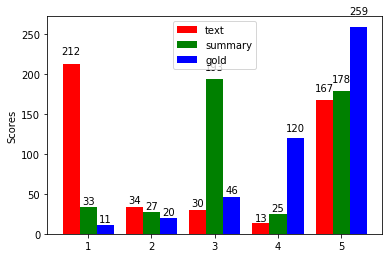

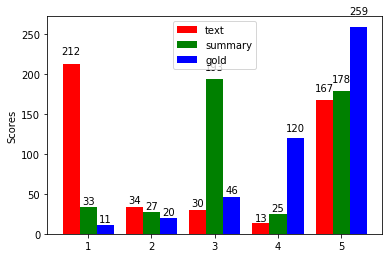

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
N = 5
ind = np.arange(N) 
width = 0.27 

# yvals = [4, 9, 2]
rects1 = ax.bar(ind, a1, width, color='r')
zvals = [1,2,3]
rects2 = ax.bar(ind+width, a2, width, color='g')
kvals = [11,12,13]
rects3 = ax.bar(ind+width*2, a0, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels(np.arange(1,6))

ax.legend( (rects1[0], rects2[0], rects3[0]), ('text', 'summary', 'gold') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.savefig('output1.png', dpi=300)
plt.show()